In [1]:
from string import ascii_letters , digits
from itertools import product

#Concatenar letas y dígitos en una sola cadena
caracteres = ascii_letters+digits

def buscador(con):
    
    #Archivo con todas las combinaciones generadas
    archivo = open("combinaciones.txt", "w")
    
    if 3<= len(con) <= 4:
        for i in range(3,5):
            for comb in product(caracteres, repeat = i):
                #Se utiliza join() para concatenar los caracteres regresado por la función product().
                #Como join necesita una cadena inicial para hacer la concatenación, se pone una cadena vacía
                #al principio
                prueba = "".join(comb)
                #Escribiendo al archivo cada combinación generada
                archivo.write( prueba + "\n"  )
                if  prueba == con:
                    print('Tu contraseña es {}'.format(prueba))
                    #Cerrando el archivo
                    archivo.close()
                    break
    else:
        print('Ingresa una contraseña que contenga de 3 a 4 caracteres')

In [2]:
from time import time
t0 = time() 
con = 'H0l4'
buscador(con)
print("Tiempos de ejecución {}".format(round(time()-t0, 6)))

Tu contraseña es H0l4
Tiempos de ejecución 3.418697


In [3]:
def cambio(cantidad, denominaciones):
    resultado = []
    while (cantidad > 0):
        if (cantidad >= denominaciones[0]):
            
            num = cantidad // denominaciones[0]
            cantidad = cantidad - (num * denominaciones[0])
            resultado.append([denominaciones[0], num])
        denominaciones = denominaciones[1:]  #Se va consumiendo la lista de denominaciones
    return resultado

In [4]:
#Pruebas del algoritmo
print (cambio(1000, [500, 200, 100, 50, 20, 5, 1]))

print (cambio(500, [500, 200, 100, 50, 20, 5, 1]))

print (cambio(300, [50, 20, 5, 1]))

print (cambio(200, [5]))

print (cambio(98, [50, 20, 5, 1]))

[[500, 2]]
[[500, 1]]
[[50, 6]]
[[5, 40]]
[[50, 1], [20, 2], [5, 1], [1, 3]]


In [5]:
print (cambio(98, [5, 20, 1, 50]))

[[5, 19], [1, 3]]


In [6]:
def fibonacci_iterativo_v1(numero):
    f1=0
    f2=1
    tmp=0
    for i in range(1,numero-1):
        tmp = f1+f2
        f1=f2
        f2=tmp
    return f2

In [7]:
fibonacci_iterativo_v1(6)

5

In [8]:
def fibonacci_iterativo_v2(numero):
    f1=0
    f2=1
    for i in range(1, numero-1):
        f1,f2=f2,f1+f2    #Asignación paralela
    return f2

In [9]:
fibonacci_iterativo_v2(6)

5

In [10]:
def fibonacci_bottom_up(numero):
    f_parciales = [0, 1, 1]  #Esta es la lista que mantiene las soluciones previamente calculadas
    while len(f_parciales) < numero:
        f_parciales.append(f_parciales[-1] + f_parciales[-2])
        print(f_parciales)
    return f_parciales[numero-1]

In [11]:
fibonacci_bottom_up(5)

[0, 1, 1, 2]
[0, 1, 1, 2, 3]


3

In [12]:
#Memoria inicial
memoria = {1:0, 2:1, 3:1}

In [13]:
def fibonacci_top_down(numero):
    if numero in memoria:      #Si el número ya se encuentra calculado, se regresa el valor ya ya no se hacen más cálculos
        return memoria[numero]
    f = fibonacci_iterativo_v2(numero-1) + fibonacci_iterativo_v2(numero-2)
    memoria[numero] = f
    return memoria[numero]

In [14]:
fibonacci_top_down(12)

89

In [15]:
#Memoria después de obtener el elemento 12 de la sucesión de Fibonacci
memoria

{1: 0, 2: 1, 3: 1, 12: 89}

In [16]:
#Memoria después de obtener el elemento 8 de la sucesión de Fibonacci
fibonacci_top_down(8)

13

In [17]:
memoria

{1: 0, 2: 1, 3: 1, 12: 89, 8: 13}

In [18]:
#Se carga la biblioteca
import pickle

#Guardar variable
#No hay restricción en lo que se pone como extensión del archivo, 
#generalmente se usa .p o .pickle como estandar.
archivo = open('memoria.p', 'wb')   #Se abre el archivo para escribir en modo binario
pickle.dump(memoria, archivo)       #Se guarda la variable memoria que es un diccionario
archivo.close()                     #Se cierra el archivo

In [19]:
#Leer variable
archivo = open('memoria.p', 'rb')          #Se abre el archivo para leer en modo binario
memoria_de_archivo = pickle.load(archivo)  #Se lee la variable
archivo.close()  

In [20]:
memoria

{1: 0, 2: 1, 3: 1, 12: 89, 8: 13}

In [21]:
memoria_de_archivo

{1: 0, 2: 1, 3: 1, 12: 89, 8: 13}

In [22]:
def insertionSort(n_lista):
    for index in range(1,len(n_lista)):
        actual = n_lista[index]
        posicion = index
        print("valor a ordenar = {}".format(actual))
        while posicion>0 and n_lista[posicion-1]>actual:
            n_lista[posicion]=n_lista[posicion-1]
            posicion = posicion-1           
        n_lista[posicion]=actual
        print(n_lista)
        print() 
    return n_lista

In [23]:
# Datos de entrada
lista = [21, 10, 0, 11, 9, 24, 20, 14, 1]
print("lista desordenada {}".format(lista))
insertionSort(lista)
print("lista ordenada {}".format(lista))

lista desordenada [21, 10, 0, 11, 9, 24, 20, 14, 1]
valor a ordenar = 10
[10, 21, 0, 11, 9, 24, 20, 14, 1]

valor a ordenar = 0
[0, 10, 21, 11, 9, 24, 20, 14, 1]

valor a ordenar = 11
[0, 10, 11, 21, 9, 24, 20, 14, 1]

valor a ordenar = 9
[0, 9, 10, 11, 21, 24, 20, 14, 1]

valor a ordenar = 24
[0, 9, 10, 11, 21, 24, 20, 14, 1]

valor a ordenar = 20
[0, 9, 10, 11, 20, 21, 24, 14, 1]

valor a ordenar = 14
[0, 9, 10, 11, 14, 20, 21, 24, 1]

valor a ordenar = 1
[0, 1, 9, 10, 11, 14, 20, 21, 24]

lista ordenada [0, 1, 9, 10, 11, 14, 20, 21, 24]


In [24]:
def quicksort(lista):
    quicksort_aux(lista,0,len(lista)-1)

def quicksort_aux(lista,inicio, fin):
    if inicio < fin:

        pivote = particion(lista,inicio,fin)

        quicksort_aux(lista, inicio, pivote-1)
        quicksort_aux(lista, pivote+1, fin)

In [25]:
def particion(lista, inicio, fin):
    #Se asigna como pivote en número de la primera localidad
    pivote = lista[inicio]
    print("Valor del pivote {}".format(pivote))
    #Se crean dos marcadores 
    izquierda = inicio+1
    derecha = fin
    print("Índice izquierdo {}".format(izquierda))
    print("Índice derecho {}".format(derecha))

    
    bandera = False
    while not bandera:
        while izquierda <= derecha and lista[izquierda] <= pivote:
            izquierda = izquierda + 1
        while lista[derecha] >= pivote and derecha >=izquierda:
            derecha = derecha -1
        if derecha < izquierda:
            bandera= True
        else:
            temp=lista[izquierda]
            lista[izquierda]=lista[derecha]
            lista[derecha]=temp
            
    print(lista)


    temp=lista[inicio]
    lista[inicio]=lista[derecha]
    lista[derecha]=temp
    return derecha

In [26]:
lista = [21, 10, 0, 11, 9, 24, 20, 14, 1]
print("lista desordenada {}".format(lista))
quicksort(lista)
print("lista ordenada {}".format(lista))

lista desordenada [21, 10, 0, 11, 9, 24, 20, 14, 1]
Valor del pivote 21
Índice izquierdo 1
Índice derecho 8
[21, 10, 0, 11, 9, 1, 20, 14, 24]
Valor del pivote 14
Índice izquierdo 1
Índice derecho 6
[14, 10, 0, 11, 9, 1, 20, 21, 24]
Valor del pivote 1
Índice izquierdo 1
Índice derecho 4
[1, 0, 10, 11, 9, 14, 20, 21, 24]
Valor del pivote 10
Índice izquierdo 3
Índice derecho 4
[0, 1, 10, 9, 11, 14, 20, 21, 24]
lista ordenada [0, 1, 9, 10, 11, 14, 20, 21, 24]


In [27]:
# Importando bibliotecas
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
#Cargando módulos
import random
from time import time

#Cargando las funciones guardadas en los archivo
from insertionSort import insertionSort_time
#Sólo se necesita llamar a la función principal
from quickSort import quicksort_time

ModuleNotFoundError: No module named 'insertionSort'

In [29]:
#Tamaños de la lista de números aleatorios a generar
datos = [ii*100 for ii in range(1,21)] 

tiempo_is = []  #Lista para guardar el tiempo de ejecución de insert sort
tiempo_qs = []  #Lista para guardar el tiempo de ejecución de quick sort

for ii in datos:
    lista_is = random.sample(range(0, 10000000), ii)
    #Se hace una copia de la lista para que se ejecute el algoritmo con los mismo números
    lista_qs = lista_is.copy() 
    
    t0 = time()  #Se guarda el tiempo inicial
    insertionSort_time(lista_is)
    tiempo_is.append(round(time()-t0, 6))   #Se le resta al tiempo actual, el tiempo inicial
    
    t0 = time()    
    quicksort_time(lista_qs)
    tiempo_qs.append(round(time()-t0, 6))

NameError: name 'insertionSort_time' is not defined

In [30]:
# Se imprimen los tiempos parciales de ejecución
print("Tiempos parciales de ejecución en INSERT SORT {} [s] \n".format(tiempo_is))
print("Tiempos parciales de ejecución en QUICK SORT {} [s]".format(tiempo_qs))

Tiempos parciales de ejecución en INSERT SORT [] [s] 

Tiempos parciales de ejecución en QUICK SORT [] [s]


In [31]:
# Se imprimen los tiempos totales de ejecución
# Para calcular el tiempo total se aplica la función sum() a las listas de tiempo
print("Tiempo total de ejecución en insert sort {} [s]".format(sum(tiempo_is)))
print("Tiempo total de ejecución en quick sort {} [s]".format(sum(tiempo_qs)))

Tiempo total de ejecución en insert sort 0.0 [s]
Tiempo total de ejecución en quick sort 0.0 [s]


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

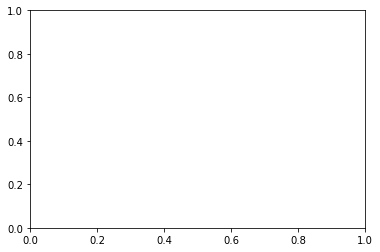

In [32]:
#Generando la gráfica
fig, ax = subplots()
ax.plot(datos, tiempo_is, label="insert sort", marker="*",color="r")
ax.plot(datos, tiempo_qs, label="quick sort", marker="o",color="b")
ax.set_xlabel('Datos') 
ax.set_ylabel('Tiempo') 
ax.grid(True)
ax.legend(loc=2); 

plt.title('Tiempo de ejecución [s] (insert vs. quick)')
plt.show()

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

times = 0

def insertionSort_graph(n_lista):
    global times
    for index in range(1,len(n_lista)):
        times += 1
        actual = n_lista[index]
        posicion = index
        while posicion>0 and n_lista[posicion-1]>actual:
            times += 1
            n_lista[posicion]=n_lista[posicion-1]
            posicion = posicion-1           
        n_lista[posicion]=actual
    return n_lista

In [34]:
TAM = 101
eje_x = list(range(1,TAM,1))
eje_y = []
lista_variable = []

for num in eje_x:
    lista_variable = random.sample(range(0, 1000), num)
    times = 0
    lista_variable = insertionSort_graph(lista_variable)
    eje_y.append(times)

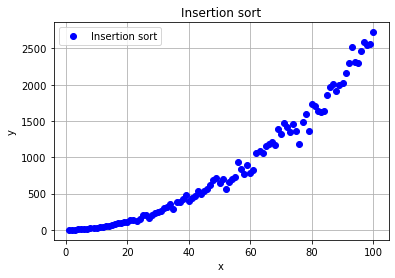

In [35]:
fig, ax = plt.subplots(facecolor='w', edgecolor='k')
ax.plot(eje_x, eje_y, marker="o",color="b", linestyle='None')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend(["Insertion sort"])

plt.title('Insertion sort')
plt.show()